# BMI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 1. data

In [ ]:
# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/bmi.csv'
df = pd.read_csv(data, skiprows=3)

df.shape  # (20000, 3)

# 결측치 확인 및 처리
df.isnull().sum()  # 결측치는 없음

# 이상치 확인
zscore_threshold = 1.8
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]

# x, t 데이터 나누기
x_data = df[['height', 'weight']].values  # 2차원
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

### 2. sklearn Model

In [ ]:
# Model
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy
result = accuracy_score(t_data_test, predict_value)

print(result)  # 0.9855

# prediction
height = 187
weight = 80
my_state = np.array([[height, weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))

print(my_result)  # [1]


0.9855
[1]


### 3. Tensorflow Model

In [ ]:
# Module import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape={2,}))
keras_model.add(Dense(units=3, activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss="sparse_categorical_crossentropy",  # 입력을 one-hot encoding으로 해줘야 함 => sparse
                    metrics=['acc'])

# 학습
keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)

# 마지막 학습 결과
# 350/350 [==============================] - 1s 2ms/step - loss: 0.0636 - acc: 0.9813 - val_loss: 0.0548 - val_acc: 0.9843

In [ ]:
# Evaluation
model_eval = keras_model.evaluate(x_data_test_norm,
                                  t_data_test)

print(model_eval)  # [0.056868188083171844, 0.9853333234786987]

# prediction
height = 187
weight = 80
my_state = np.array([[height, weight]])
my_result = keras_model.predict(scaler.transform(my_state))

print(my_result)  # [[2.3042600e-07 9.9349678e-01 6.5029864e-03]] => 2번째의 값이 가장 크므로 [1]

188/188 [==============================] - 0s 2ms/step - loss: 0.0569 - acc: 0.9853
[0.056868188083171844, 0.9853333234786987]
1/1 [==============================] - 0s 22ms/step
[[2.3042600e-07 9.9349678e-01 6.5029864e-03]]


### [참고] 평가 지표

In [ ]:
from sklearn.metrics import classification_report

t_true = [0, 1, 2, 2, 2]
t_pred = [0, 0, 2, 2, 1]

label_names = ['thin', 'normal', 'fat']

print(classification_report(t_true, t_pred, target_names=label_names))

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



# Iris
- 붓꽃은 3가지 종이 있음
- setosa, versicolor, verginica
- 붓꽃의 꽃받침과 꽃잎의 길이와 너비에 따라서 품종이 결정
- 데이터는 총 150개의 데이터
- 꽃받침(sepal), 꽃잎(petal)

In [ ]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 1. data

In [ ]:
iris = load_iris()
# print(iris.data)  # x_data, 꽃받침과 꽃잎의 길이와 너비
# print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.target)  # t_data
# print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

df = pd.DataFrame(iris.data, columns=iris.feature_names.append('target'))
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df.shape  # (150, 5)

# 결측치 확인
df.isnull().sum()  # 결측치는 존재하지 않음

# 중복데이터 확인
# 일반적으로 중복 데이터는 지우는 것이 맞음
# 중복 데이터가 있어야 하는 경우도 있으므로 확인 필요
df.duplicated().sum()  # 1, 중복행 존재
df[df.duplicated()]  # index 142
df = df.drop_duplicates()  # 149 rows × 4 columns

# 다중공선성을 파악하기 위한 상관분석
# [주의] 상관성은 인과관계가 아닌 연관성만 알려줌
display(df.corr())  # sepal_length와 petal_length, petal_width의 상관성 높음

x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values.reshape(-1, 1)

# 이번 학습에서는 이상치 확인 생략

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=42)

#display(df)

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


### 2. Tensorflow Keras Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss="sparse_categorical_crossentropy",
                    metrics=["acc"])

# 학습
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=500,
                          verbose=1,
                          validation_split=0.2)

# learning_rate = 1e-2
# 3/3 [==============================] - 0s 37ms/step - loss: 0.2190 - acc: 0.9759 - val_loss: 0.1616 - val_acc: 1.0000

# learning_rate = 1e-1
# 3/3 [==============================] - 0s 41ms/step - loss: 0.0551 - acc: 0.9880 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 1/500
3/3 [==============================] - 1s 97ms/step - loss: 0.9892 - acc: 0.5542 - val_loss: 0.9035 - val_acc: 0.5714
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 0.8469 - acc: 0.6747 - val_loss: 0.7822 - val_acc: 0.5714
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7221 - acc: 0.6867 - val_loss: 0.7519 - val_acc: 0.5714
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6625 - acc: 0.6867 - val_loss: 0.6861 - val_acc: 0.5714
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5893 - acc: 0.6867 - val_loss: 0.5920 - val_acc: 0.6190
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5371 - acc: 0.7831 - val_loss: 0.5194 - val_acc: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5120 - acc: 0.9398 - val_loss: 0.4824 - val_acc: 1.0000
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 0.4813 - acc: 0.91

In [ ]:
print(keras_model.evaluate(x_data_test_norm, t_data_test))  # [0.11741314083337784, 0.9111111164093018]

2/2 [==============================] - 0s 9ms/step - loss: 0.1174 - acc: 0.9111
[0.11741314083337784, 0.9111111164093018]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


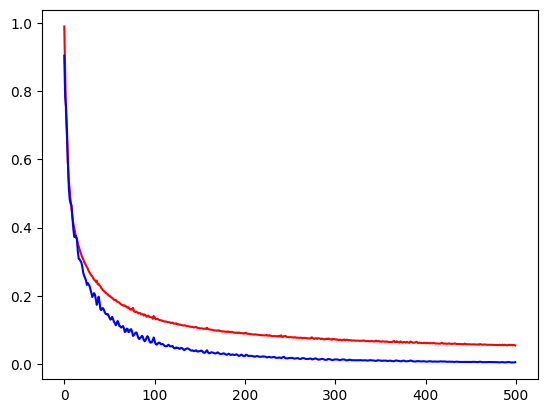

In [ ]:
# 시각화를 통한 overfitting 확인
print(history.history.keys())

plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()

# val_loss가 더 낮음을 확인
# loss가 우하향을 하는 것을 확인하면서 잘 만들어진 모델이라는 것을 알 수 있음